In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer

In [2]:
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.3 MB/s eta 0:00:00


In [3]:
import category_encoders as ce

In [4]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
import seaborn as sns

In [5]:
import seaborn as sns
from sklearn.svm import SVC

In [6]:
dataset= pd.read_csv("/content/churn_prediction.csv")
dataset.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,Male,0.0,self_employed,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,2,310,35,Male,0.0,self_employed,NaN,2,3214,60.0,...,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,4,2356,31,Male,0.0,salaried,146.0,2,41,NaN,...,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,5,478,90,NaN,NaN,self_employed,1020.0,2,582,147.0,...,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,6,2531,42,Male,2.0,self_employed,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1


In [7]:

dataset.shape

(28382, 21)

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28382 entries, 0 to 28381
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   customer_id                     28382 non-null  int64  
 1   vintage                         28382 non-null  int64  
 2   age                             28382 non-null  int64  
 3   gender                          27857 non-null  object 
 4   dependents                      25919 non-null  float64
 5   occupation                      28302 non-null  object 
 6   city                            27579 non-null  float64
 7   customer_nw_category            28382 non-null  int64  
 8   branch_code                     28382 non-null  int64  
 9   days_since_last_transaction     25159 non-null  float64
 10  current_balance                 28382 non-null  float64
 11  previous_month_end_balance      28382 non-null  float64
 12  average_monthly_balance_prevQ   

In [9]:
dataset.isnull().sum()

customer_id                          0
vintage                              0
age                                  0
gender                             525
dependents                        2463
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
days_since_last_transaction       3223
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
dtype: int64

In [10]:
imputer = SimpleImputer(strategy='most_frequent')

# Fit and transform the 'city' column
dataset[['city', 'gender', 'occupation']] = imputer.fit_transform(dataset[['city', 'gender', 'occupation']])

In [11]:
imputer = SimpleImputer(strategy='mean')
dataset[['days_since_last_transaction','dependents']] = imputer.fit_transform(dataset[['days_since_last_transaction','dependents']])


In [12]:
encoder = ce.TargetEncoder(cols=['occupation', 'gender'])

# Fit and transform the data (replace 'Exited' with your target column)
encoded_data = encoder.fit_transform(dataset[['occupation', 'gender']], dataset['churn'])

# Update original dataset with encoded values
dataset[['occupation', 'gender']] = encoded_data[['occupation', 'gender']]

# Print updated dataset
print(dataset)

       customer_id  vintage  age    gender  dependents  occupation    city  \
0                1     3135   66  0.191823    0.000000    0.198223   187.0   
1                2      310   35  0.191823    0.000000    0.198223  1020.0   
2                4     2356   31  0.191823    0.000000    0.171092   146.0   
3                5      478   90  0.191823    0.347236    0.198223  1020.0   
4                6     2531   42  0.191823    2.000000    0.198223  1494.0   
...            ...      ...  ...       ...         ...         ...     ...   
28377        30297     1845   10  0.175524    0.000000    0.157434  1020.0   
28378        30298     4919   34  0.175524    0.000000    0.198223  1046.0   
28379        30299      297   47  0.191823    0.000000    0.171092  1096.0   
28380        30300     2585   50  0.191823    3.000000    0.198223  1219.0   
28381        30301     2349   18  0.191823    0.000000    0.157434  1232.0   

       customer_nw_category  branch_code  days_since_last_trans

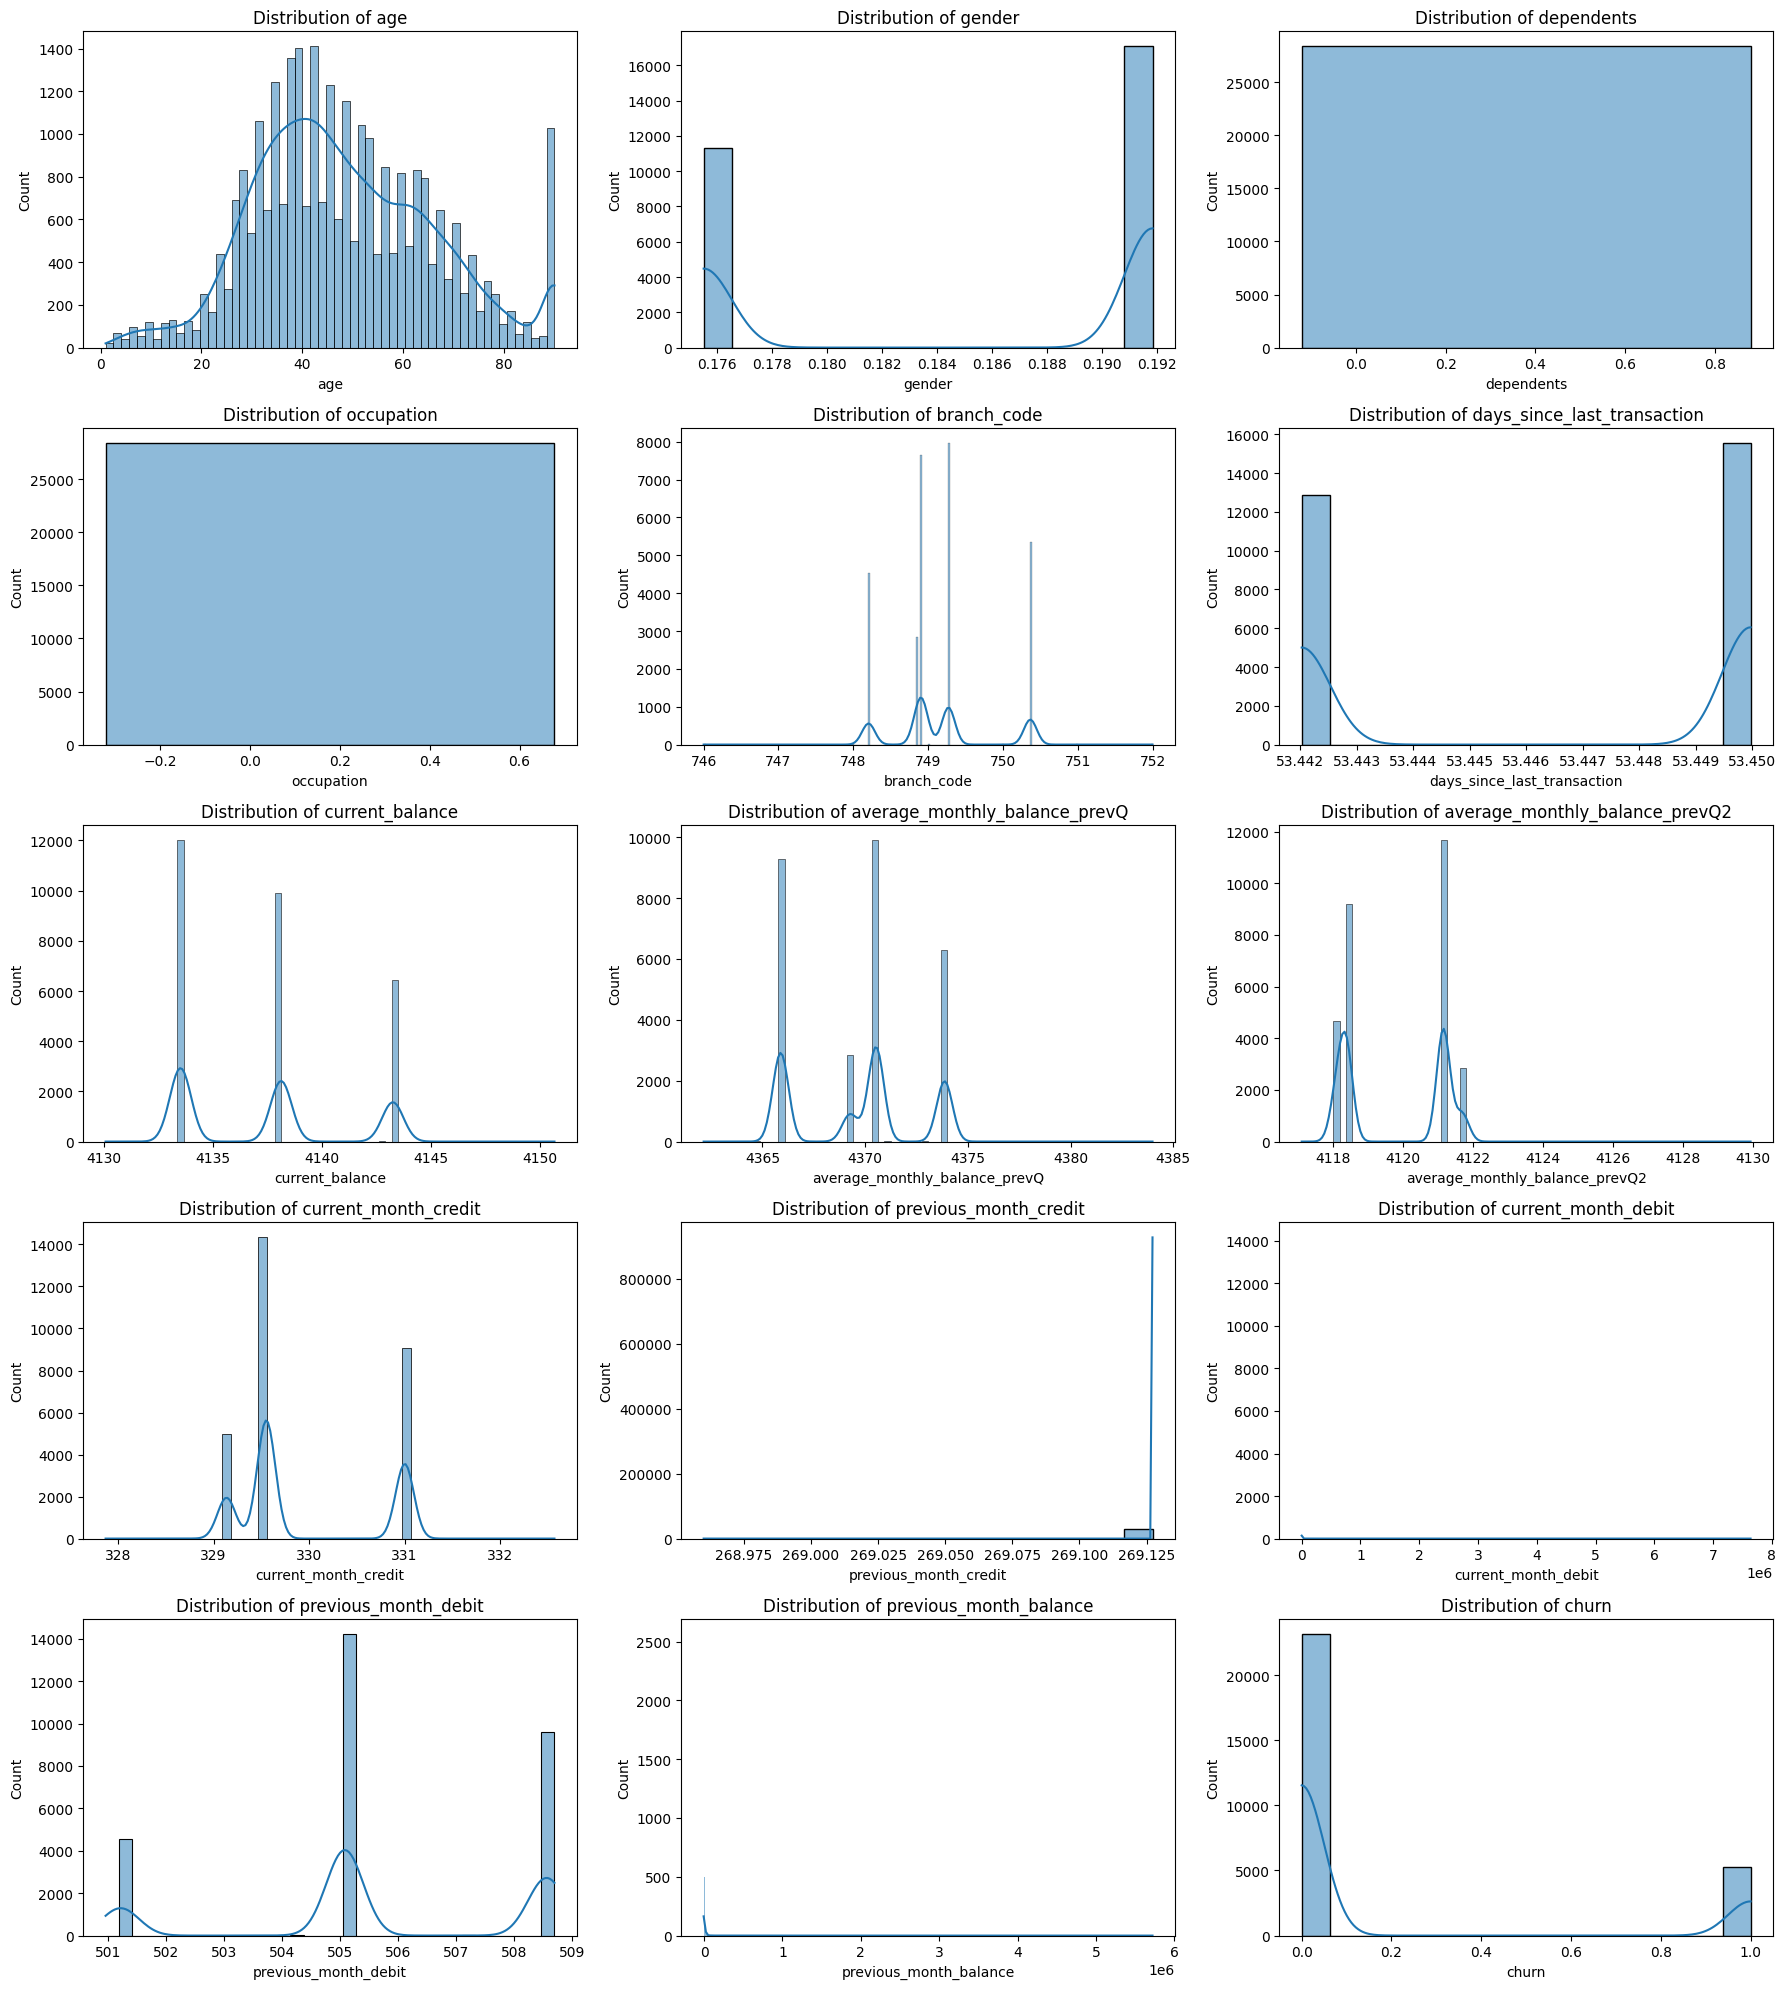

In [40]:
columns = dataset.columns
n_cols = 3
n_rows = (len(columns) + n_cols - 1) // n_cols

plt.figure(figsize=(18, n_rows * 4))

for i, col in enumerate(columns):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.histplot(dataset[col], kde=True)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

In [13]:
dataset['churn'].value_counts()

churn
0    23122
1     5260
Name: count, dtype: int64

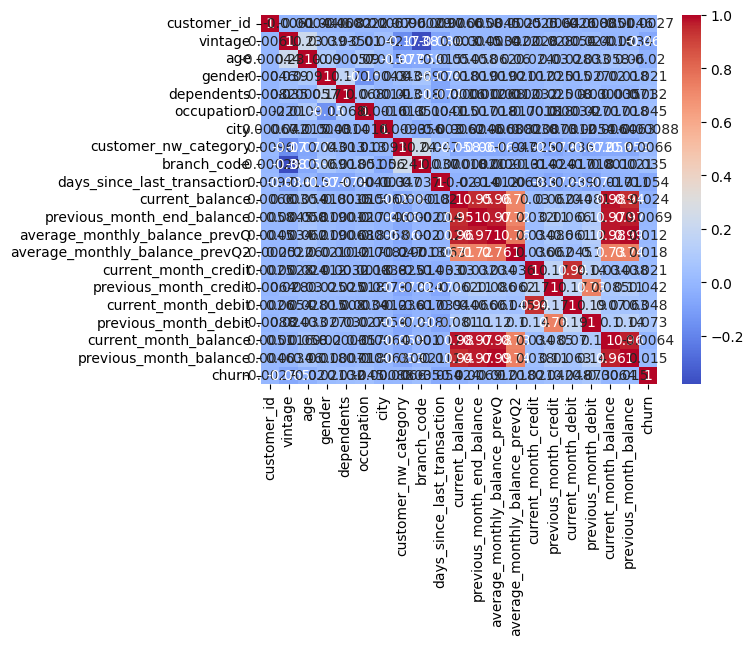

Original features: ['vintage', 'age', 'gender', 'dependents', 'occupation', 'branch_code', 'days_since_last_transaction', 'current_balance', 'average_monthly_balance_prevQ', 'average_monthly_balance_prevQ2', 'current_month_credit', 'previous_month_credit', 'current_month_debit', 'previous_month_debit', 'previous_month_balance', 'churn']
Reduced features: ['vintage', 'age', 'gender', 'dependents', 'occupation', 'branch_code', 'days_since_last_transaction', 'current_balance', 'average_monthly_balance_prevQ', 'average_monthly_balance_prevQ2', 'current_month_credit', 'previous_month_credit', 'current_month_debit', 'previous_month_debit', 'previous_month_balance', 'churn']


In [14]:

# Calculate correlation matrix
corr_matrix = dataset.corr()
# Display correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()
# Get the correlation of features with the target
correlation_with_target = corr_matrix['churn'].drop('churn')
# Set a threshold for dropping features
threshold = 0.01
# Drop features with correlation less than the threshold
features_to_drop = correlation_with_target[abs(correlation_with_target) < threshold].index
dataset = dataset.drop(columns=features_to_drop)

print(f"Original features: {dataset.columns.tolist()}")
print(f"Reduced features: {dataset.columns.tolist()}")


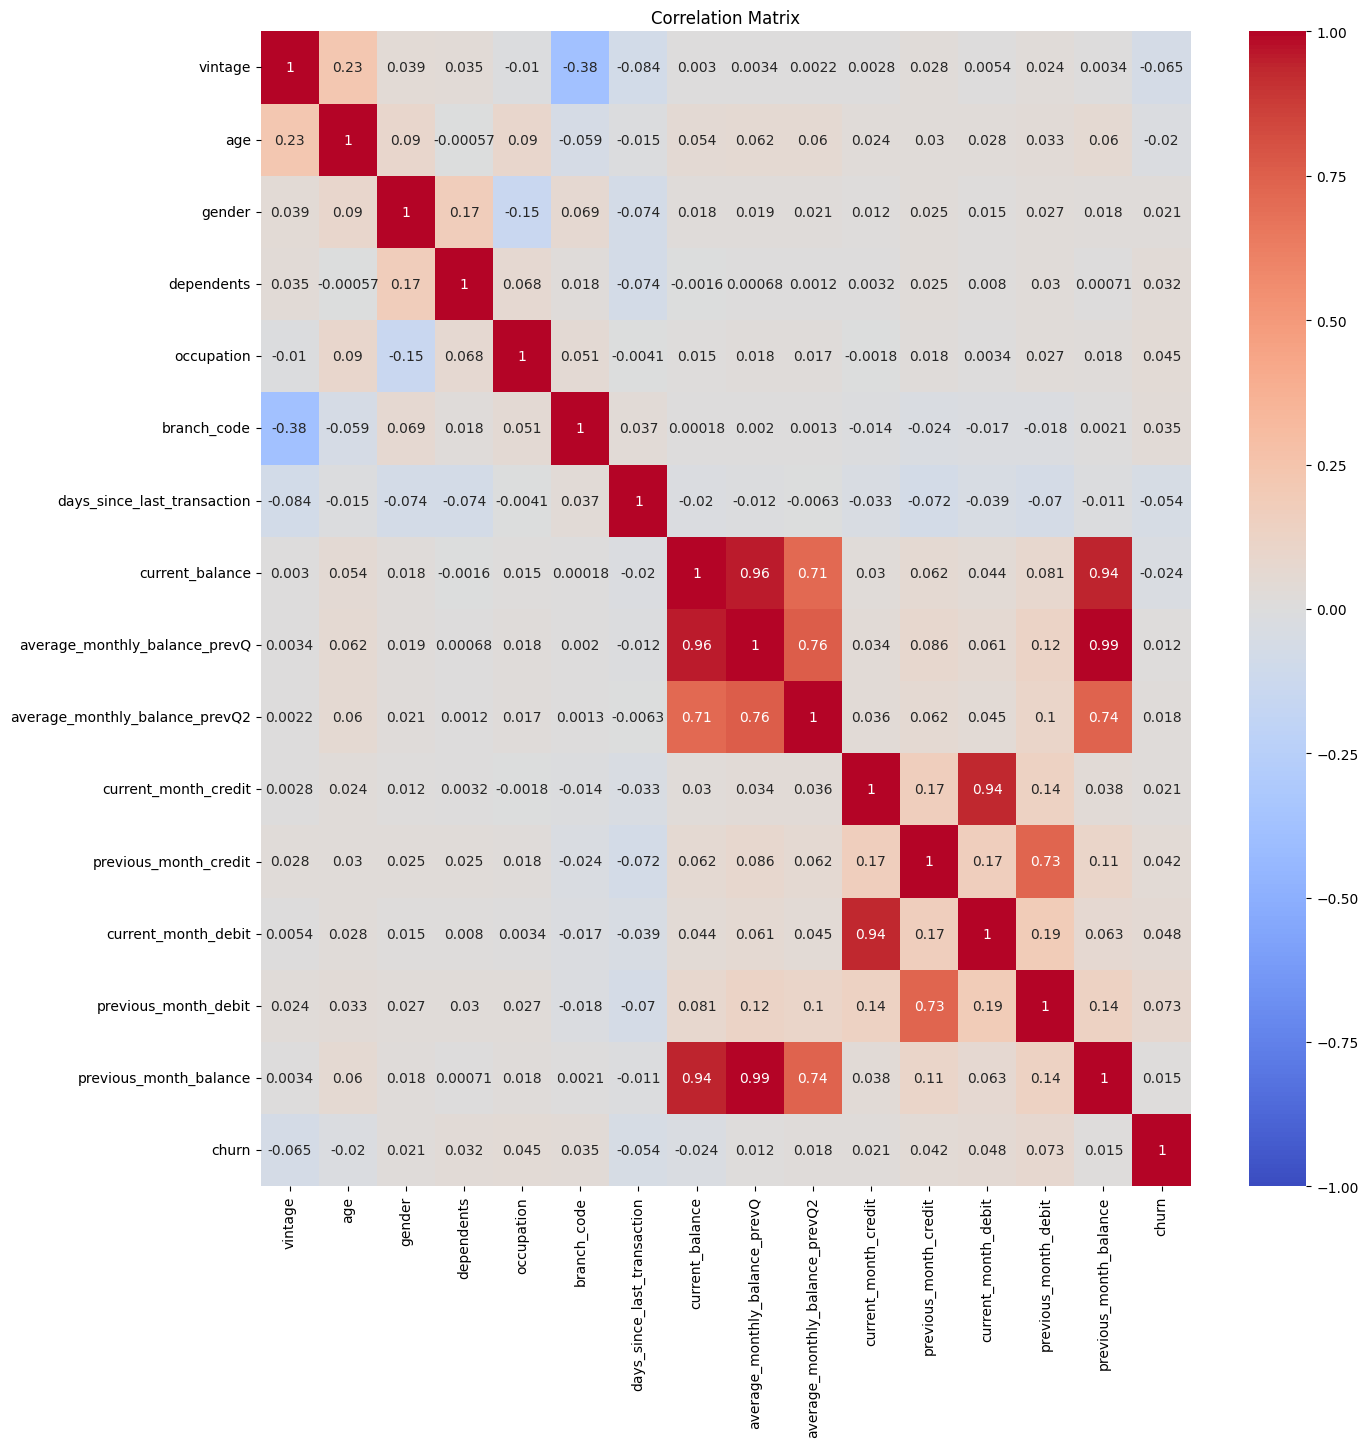

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr = dataset.corr()

# Plot the heatmap
plt.figure(figsize=(15, 15))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


In [16]:
dataset.head()

,vintage,age,gender,dependents,occupation,branch_code,days_since_last_transaction,current_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,previous_month_balance,churn
0,3135,66,0.191823,0.000000,0.198223,755,224.000000,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,0
1,310,35,0.191823,0.000000,0.198223,3214,60.000000,5390.37,7799.26,12419.41,0.56,0.56,5486.27,100.56,8787.61,0
2,2356,31,0.191823,0.000000,0.171092,41,69.997814,3913.16,4910.17,2815.94,0.61,0.61,6046.73,259.23,5070.14,0
3,478,90,0.191823,0.347236,0.198223,582,147.000000,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,1669.79,1
4,2531,42,0.191823,2.000000,0.198223,388,58.000000,927.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1677.16,1


In [17]:
dataset.drop('vintage',axis=1, inplace=True)

In [18]:
def mean_imputation(df, column):
    mean_value = df[column].mean()
    df[column] = np.where(
        (df[column] < df[column].quantile(0.95)) & (df[column] > df[column].quantile(0.05)),
        df[column],  # if not an outlier, keep original value
        mean_value  # if outlier, replace with mean
    )

# Apply mean imputation to each column with outliers
columns_with_outliers = [ 'occupation','dependents','branch_code','days_since_last_transaction','current_balance','average_monthly_balance_prevQ2','average_monthly_balance_prevQ','previous_month_debit','previous_month_credit','current_month_credit']
for i in range(13):
            for column in columns_with_outliers:
                mean_imputation(dataset, column)

In [19]:
X=dataset.iloc[:,:-1]
y=dataset.iloc[:,-1]

In [20]:
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1
threshold = 3
outliers = ((X < (Q1 - threshold * IQR)) | (X > (Q3 + threshold * IQR)))
print(outliers.sum())

age                                  0
gender                               0
dependents                           0
occupation                           0
branch_code                         21
days_since_last_transaction          0
current_balance                      0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       1
current_month_credit                 0
previous_month_credit                1
current_month_debit               2851
previous_month_debit                 0
previous_month_balance            1517
dtype: int64


In [21]:
# import pandas as pd
# import numpy as np
# from scipy.stats import zscore

# # Example DataFrame (replace with your actual data)


# # Calculate Z-score for each numeric column
# z_scores = X.apply(zscore)

# # Define threshold for outlier detection (e.g., Z-score > 3)
# outlier_threshold = 5

# # Identify outliers
# outliers = (np.abs(z_scores) > outlier_threshold).any(axis=1)

# # Remove outliers
# X = X[~outliers]

# print("Original DataFrame:")
# print(X)

# # print("\nDataFrame after removing outliers:")
# # print(df_cleaned)


In [22]:
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1
threshold = 1.5
outliers = ((X < (Q1 - threshold * IQR)) | (X > (Q3 + threshold * IQR)))
print(outliers.sum())

age                                  0
gender                               0
dependents                           0
occupation                           0
branch_code                       9917
days_since_last_transaction          0
current_balance                     13
average_monthly_balance_prevQ       16
average_monthly_balance_prevQ2      10
current_month_credit                 0
previous_month_credit                1
current_month_debit               3935
previous_month_debit                 0
previous_month_balance            2720
dtype: int64


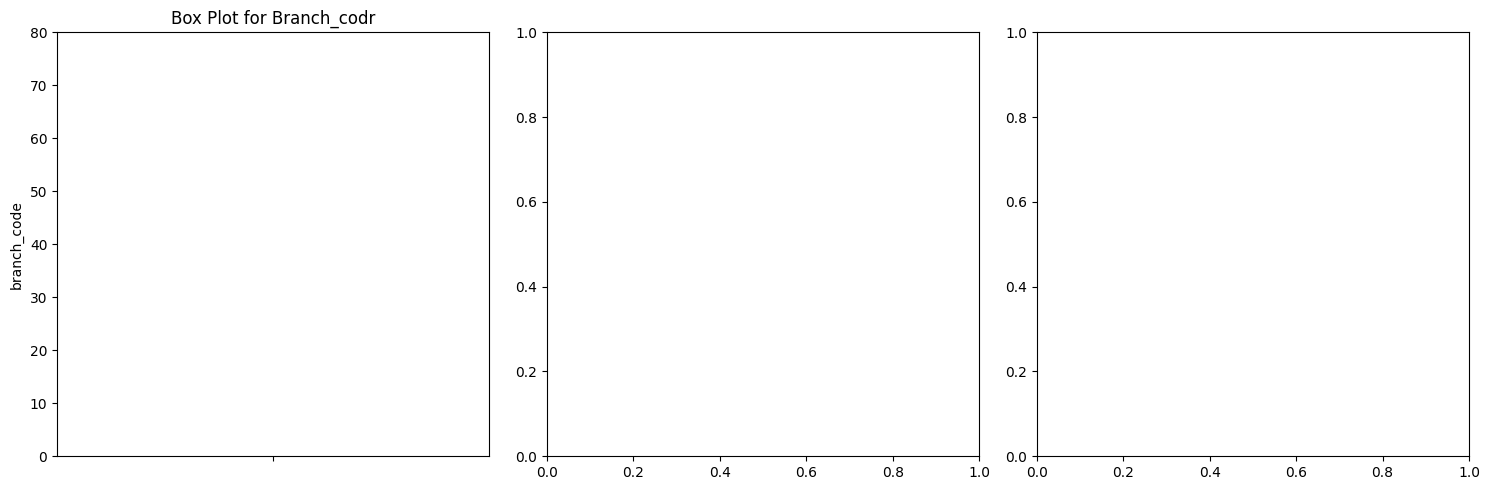

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming X is your DataFrame

# Create subplots with specified size
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot 'Age' if it exists in DataFrame X
if 'branch_code' in X.columns:
    sns.boxplot(data=X, y='branch_code', ax=axs[0])
    axs[0].set_title('Box Plot for Branch_codr')
    axs[0].set_ylim(bottom=0, top=80)

# if 'NumOfProducts' in X.columns:
#     sns.boxplot(data=X, y='NumOfProducts', ax=axs[1])
#     axs[1].set_title('Box Plot for NumofProducts')
#     axs[1].set_ylim(bottom=0, top=6)

# # Plot 'CreditScore' if it exists in DataFrame X
# if 'CreditScore' in X.columns:
#     sns.boxplot(data=X, y='CreditScore', ax=axs[2])
#     axs[2].set_title('Box Plot for CreditScore')



# Adjust layout
plt.tight_layout()  # Ensures plots fit nicely in the figure area
plt.show()


In [23]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [24]:
# smote = SMOTE(random_state=42)
# X_train, y_train= smote.fit_resample(X_train, y_train)

In [25]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)
print(X_train)

[[ 0.04493336  0.81215818  0.         ... -0.06652453  1.18047583
  -0.06485893]
 [ 0.71941644  0.81215818  0.         ...  0.5481825  -0.21727935
   0.31621881]
 [ 0.71941644  0.81215818  0.         ... -0.04395957 -0.21727935
  -0.11639441]
 ...
 [ 0.77562336  0.81215818  0.         ... -0.06651891  1.18047583
  -0.09614325]
 [ 0.83183028 -1.23128724  0.         ... -0.04144712  1.18047583
  -0.08698548]
 [ 0.21355413 -1.23128724  0.         ... -0.06151157 -0.21727935
  -0.12255049]]


In [26]:
clf = LogisticRegression(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

score = clf.score(X_test, y_test)
print(f"Accuracy score: {score}")
conf_matrix = confusion_matrix( y_test,y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy score: 0.8173330984675005
Confusion Matrix:
[[4634    5]
 [1032    6]]


In [27]:
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.82      1.00      0.90      4639
           1       0.55      0.01      0.01      1038

    accuracy                           0.82      5677
   macro avg       0.68      0.50      0.46      5677
weighted avg       0.77      0.82      0.74      5677



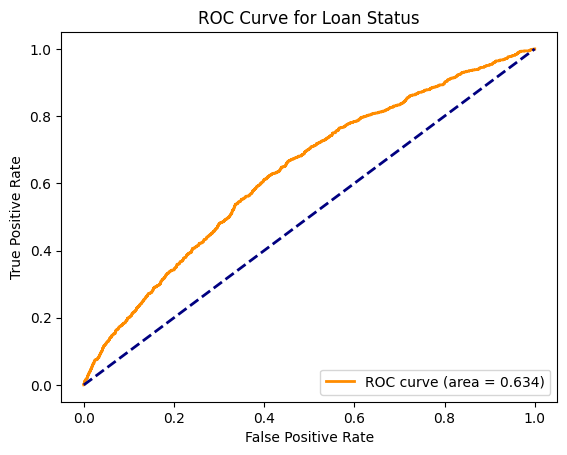

In [28]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
y_predProb = clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_predProb)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Loan Status')
plt.legend(loc='lower right')
plt.show()

In [29]:
from xgboost import XGBClassifier

model = XGBClassifier(
    random_state=42

)

model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [30]:
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])

print(f"Accuracy: {accuracy}")
print(f"ROC AUC: {roc_auc}")
print(classification_report(y_test, y_pred))


Accuracy: 0.8162762022194822
ROC AUC: 0.7204342341736164
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4639
           1       0.49      0.20      0.29      1038

    accuracy                           0.82      5677
   macro avg       0.67      0.58      0.59      5677
weighted avg       0.78      0.82      0.78      5677



In [31]:
conf_matrix = confusion_matrix( y_test,y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[4424  215]
 [ 828  210]]


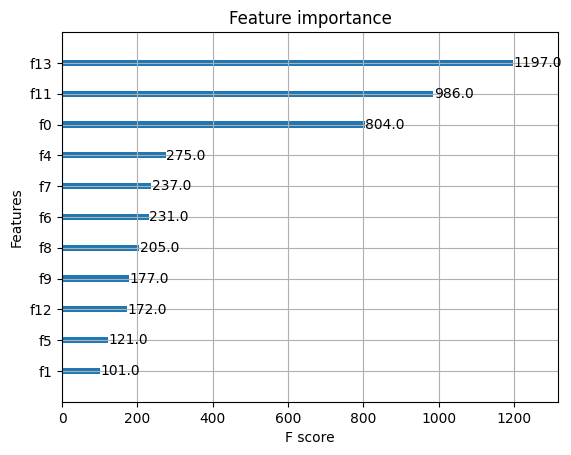

In [32]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

plot_importance(model)
plt.show()

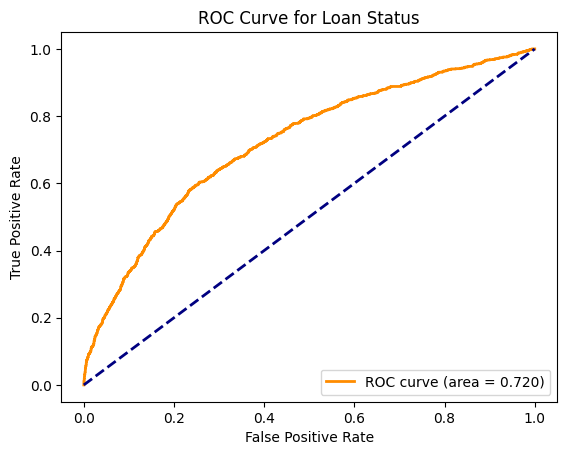

In [33]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
y_predProb = model.predict_proba(X_test)[:, 1] # Probability of positive class
fpr, tpr, thresholds = roc_curve(y_test, y_predProb) # thresholds : An array␣of thresholds used to compute fpr and tpr.
roc_auc = auc(fpr, tpr) #Compute area under the curve AUC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Loan Status')
plt.legend(loc='lower right')
plt.show()

In [34]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
rf_classifier = RandomForestClassifier(n_estimators=100,random_state=42)
rf_classifier.fit(X_train, y_train)

# Making predictions
y_pred = rf_classifier.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Output the evaluation results
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.8185661440901885
Confusion Matrix:
 [[4513  126]
 [ 904  134]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.97      0.90      4639
           1       0.52      0.13      0.21      1038

    accuracy                           0.82      5677
   macro avg       0.67      0.55      0.55      5677
weighted avg       0.78      0.82      0.77      5677



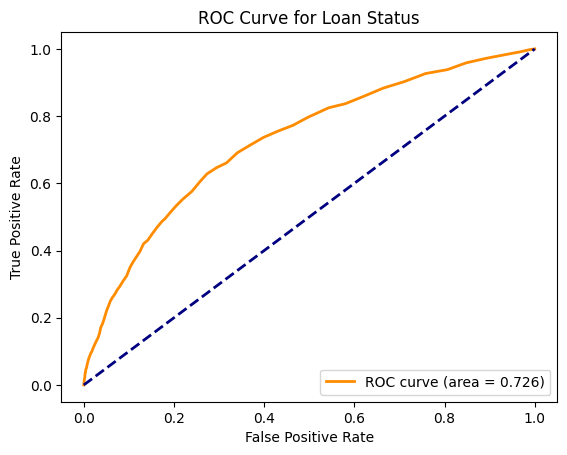

In [36]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
y_predProb = rf_classifier.predict_proba(X_test)[:, 1] # Probability of positive class
fpr, tpr, thresholds = roc_curve(y_test, y_predProb) # thresholds : An array␣of thresholds used to compute fpr and tpr.
roc_auc = auc(fpr, tpr) #Compute area under the curve AUC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Loan Status')
plt.legend(loc='lower right')
plt.show()

In [37]:
svm = SVC(probability=True)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.8180376959661794

Classification Report:
              precision    recall  f1-score   support

           0       0.82      1.00      0.90      4639
           1       1.00      0.00      0.01      1038

    accuracy                           0.82      5677
   macro avg       0.91      0.50      0.45      5677
weighted avg       0.85      0.82      0.74      5677


Confusion Matrix:
[[4639    0]
 [1033    5]]


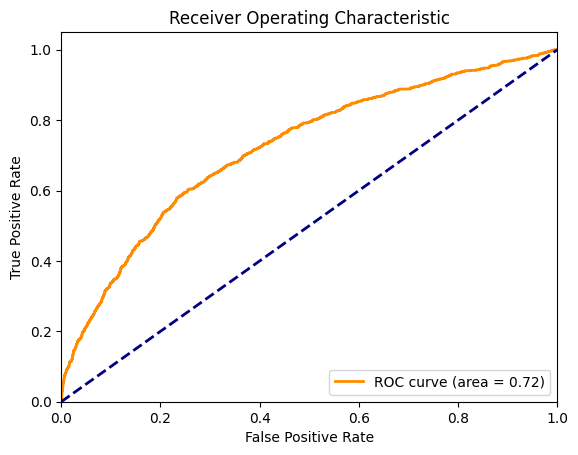

In [38]:
  # Predict probabilities for the test set
y_prob = model.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate the AUC (Area Under the Curve)
roc_auc = roc_auc_score(y_test, y_prob)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()